In [20]:
# Cas analyse Bitcoin
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [26]:
# importer changer l'index et dire que la date doit etre du type date de python
bitcoin=pd.read_csv(r"C:\Users\Rudolf\desktop\Free stuffs\MachineLearning\BTC-EUR.csv", index_col='Date',parse_dates=True)


In [27]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624


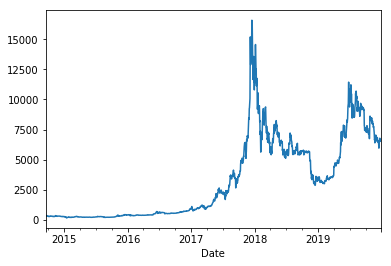

In [28]:
bitcoin['Close'].plot()
plt.show()

In [30]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-21',
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27'],
              dtype='datetime64[ns]', name='Date', length=1928, freq=None)

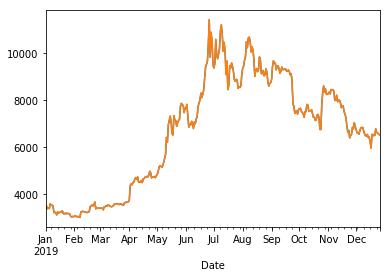

In [33]:
# evolution en 2019
bitcoin['2019']['Close'].plot()
plt.show()

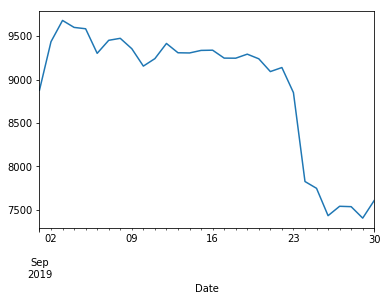

In [34]:
# evolution en septembre 2019
bitcoin['2019-09']['Close'].plot()
plt.show()

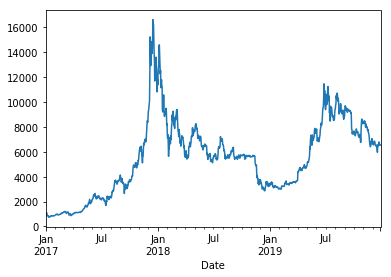

In [35]:
# slicing entre dates
# evolution en septembre 2019
bitcoin['2017':'2019']['Close'].plot()
plt.show()

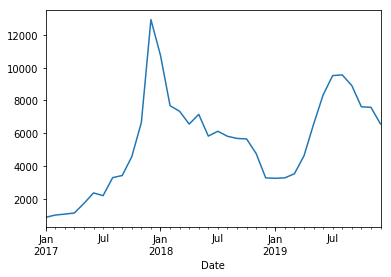

In [38]:
# Resample regrouper selon une frequence
# ici on regropupe par mois et on cherche la moyenne # M mois W semaines 2W 2 semaines 
bitcoin['2017':'2019']['Close'].resample('M').mean().plot()
plt.show()

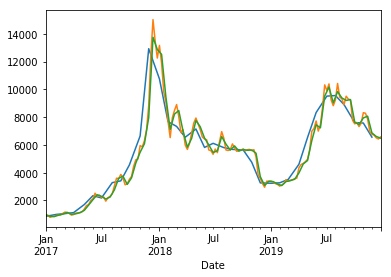

In [40]:
# affichage complet
bitcoin['2017':'2019']['Close'].resample('M').mean().plot()
bitcoin['2017':'2019']['Close'].resample('W').mean().plot()
bitcoin['2017':'2019']['Close'].resample('2W').mean().plot()

plt.show()

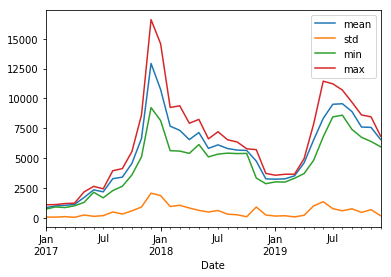

In [41]:
# Agregate pôur obtenir ce qu'on veux moyenne ecart type ect
bitcoin['2017':'2019']['Close'].resample('M').agg(['mean','std','min','max']).plot()
plt.show()

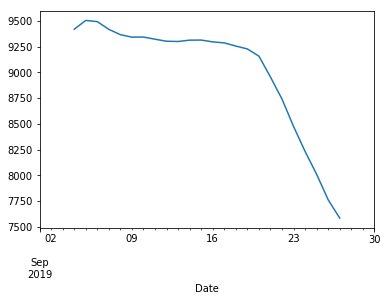

In [45]:
# Calcul de moving average on calcul la moyenne sur une fenetre à chaque fois
bitcoin.loc['2019-09','Close'].rolling(window=7, center=True).mean().plot()
plt.show()


In [ ]:
# Moyenne mobile exponentielle 


In [48]:

ethereum=pd.read_csv(r"C:\Users\Rudolf\desktop\Free stuffs\MachineLearning\ETH-EUR.csv", index_col='Date',parse_dates=True)

In [51]:
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.592821,3.231847,2.299453,2.526771,2.526771,149784
2015-08-08,2.546495,2.551098,0.651468,0.686651,0.686651,614518
2015-08-09,0.643639,0.801941,0.573504,0.640651,0.640651,485733
2015-08-10,0.651688,0.662660,0.579996,0.643283,0.643283,368004
2015-08-11,0.642956,1.024735,0.604369,0.967177,0.967177,1325151


In [55]:
#Association de deux dataframe
#pd.merge(bitcoin,ethereum,on='Date',how='inner',suffixes=('_btc','_eth'))

In [80]:
# Turtle strategy (Vielle technique de trading)
minimum=bitcoin.loc['2017-09','Close'].rolling(window=28).agg(['min','max','mean']).iloc[-1,0]
maximum=bitcoin.loc['2017-09','Close'].rolling(window=28).agg(['min','max','mean']).iloc[-1,1]

In [83]:
print(minimum)
print(maximum)

2646.77002
3857.710449


In [86]:

# si le close > max des 28 jours précédents acheter
# si le close < min des 28 jours précédents vendre